In [13]:
import os
import sys
sys.path.insert(0, '../scripts/')
import functions as fn
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open('../data/embeddings.p', 'rb') as fp:
    embeddings = pickle.load(fp)
train = pd.read_csv('../data/multinli_train.csv')

In [4]:
train['sentence1'] = train.sentence1.apply(str).apply(fn.preprocess)
train['sentence2'] = train.sentence2.apply(str).apply(fn.preprocess)

In [5]:
train.head()

,annotator_labels,sentence1,sentence2,genre,gold_label
0,['neutral'],conceptually cream skimming has two basic dime...,product and geography are what make cream skim...,government,neutral
1,['entailment'],you know during the season and i guess at at y...,you lose the things to the following level if ...,telephone,entailment
2,['entailment'],one of our number will carry out your instruct...,a member of my team will execute your orders w...,fiction,entailment
3,['entailment'],how do you know all this is their information ...,this information belongs to them,fiction,entailment
4,['neutral'],yeah i tell you what though if you go price so...,the tennis shoes have a range of prices,telephone,neutral


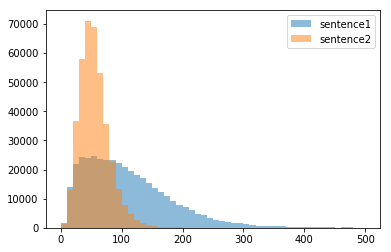

In [6]:
len1 = [len(s) for s in train.sentence1]
len2 = [len(s) for s in train.sentence2]
n, bins, patches = plt.hist(len1,bins=50,range=(0,500),alpha=0.5,label="sentence1")
n1, bins1, patches1 = plt.hist(len2,bins=50,range=(0,500),alpha=0.5,label="sentence2")
plt.legend(loc="upper right")
plt.show()

The distribution in length for each of the setences are very different, with sentence 1 being much longer. Sentence 1 is what is called the premise, and sentence 2 is the hypothesis (the sentence from which we evaulate whether the statements entails, contradicts, or is neutral with the premise). So the hypothesis is shorter than the premise.

In [7]:
train.gold_label.value_counts()

contradiction    130903
neutral          130900
entailment       130899
Name: gold_label, dtype: int64

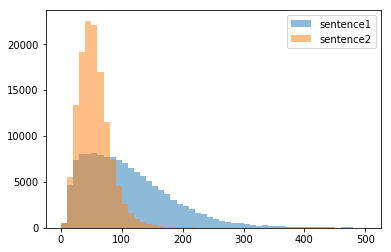

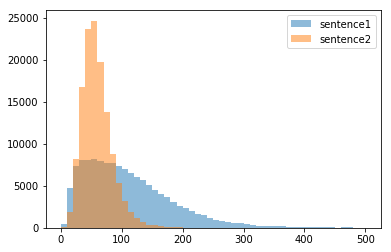

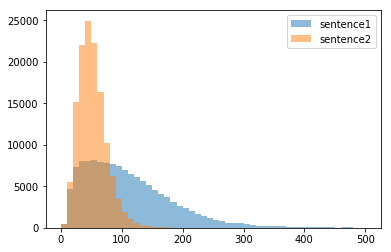

In [8]:
len1 = [len(s) for s in train.query('gold_label == "entailment"').sentence1]
len2 = [len(s) for s in train.query('gold_label == "entailment"').sentence2]
n, bins, patches = plt.hist(len1,bins=50,range=(0,500),alpha=0.5,label="sentence1")
n1, bins1, patches1 = plt.hist(len2,bins=50,range=(0,500),alpha=0.5,label="sentence2")
plt.legend(loc="upper right")
plt.show()
len1 = [len(s) for s in train.query('gold_label == "neutral"').sentence1]
len2 = [len(s) for s in train.query('gold_label == "neutral"').sentence2]
n, bins, patches = plt.hist(len1,bins=50,range=(0,500),alpha=0.5,label="sentence1")
n1, bins1, patches1 = plt.hist(len2,bins=50,range=(0,500),alpha=0.5,label="sentence2")
plt.legend(loc="upper right")
plt.show()
len1 = [len(s) for s in train.query('gold_label == "contradiction"').sentence1]
len2 = [len(s) for s in train.query('gold_label == "contradiction"').sentence2]
n, bins, patches = plt.hist(len1,bins=50,range=(0,500),alpha=0.5,label="sentence1")
n1, bins1, patches1 = plt.hist(len2,bins=50,range=(0,500),alpha=0.5,label="sentence2")
plt.legend(loc="upper right")
plt.show()

The distributions for each of the labels appear to be the same. The above shows the distribution for entailment, neutral, and conradiction

In [9]:
train.genre.value_counts()

telephone     83348
government    77350
travel        77350
fiction       77348
slate         77306
Name: genre, dtype: int64

The distributions across genres appear to be the same, except for having a few more telephone conversations. Next we look at a few examples for each of the genres to see what each of the topics are like

In [10]:
for genre in train.genre.unique():
    print('----------------------------------------------------------')
    print('Genre: ' + genre)
    sub_train = train.query('genre==@genre')
    for i in range(5):
        print('Premise: ' + sub_train.sentence1.iloc[i])
        print('Hypothesis: ' + sub_train.sentence2.iloc[i])
        print('Evaluation: ' + sub_train.gold_label.iloc[i])

----------------------------------------------------------
Genre: government
Premise: conceptually cream skimming has two basic dimensions product and geography
Hypothesis: product and geography are what make cream skimming work
Evaluation: neutral
Premise: i don't mean to be glib about your concerns but if i were you i might be more concerned about the near term rate implications of this 1
Hypothesis: i am concerned more about your issues than the near term rate implications
Evaluation: contradiction
Premise: issues in data synthesis
Hypothesis: problems in data synthesis
Evaluation: entailment
Premise: this analysis pooled estimates from these two studies to develop a c r function linking pm to chronic bronchitis
Hypothesis: the analysis proves that there is no link between pm and bronchitis
Evaluation: contradiction
Premise: we sought to identify practices that were commonly implemented by the agencies within the past 5 years
Hypothesis: we want to identify practices commonly used b

In [11]:
print(train.sentence1.apply(lambda x: len(x.split())).describe())

count    392702.000000
mean         20.060427
std          14.417174
min           1.000000
25%          10.000000
50%          17.000000
75%          26.000000
max         382.000000
Name: sentence1, dtype: float64


In [12]:
print(train.sentence2.apply(lambda x: len(x.split())).describe())

count    392702.000000
mean         10.021151
std           4.275446
min           1.000000
25%           7.000000
50%           9.000000
75%          12.000000
max          69.000000
Name: sentence2, dtype: float64


Next we look at the embeddings. The embeddings we saved are all of the tokens found in the dataset.

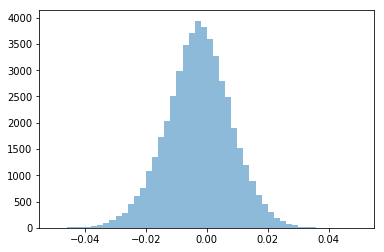

Average mean: -0.002695773


In [24]:
means = [np.mean(embeddings[key]) for key in embeddings.keys()]
stds = [np.std(embeddings[key]) for key in embeddings.keys()]
n, bins, patches = plt.hist(means,bins=50,range=(-.05,.05),alpha=0.5,label="sentence1")
plt.show()
print('Average mean: '+str(np.mean(means)))

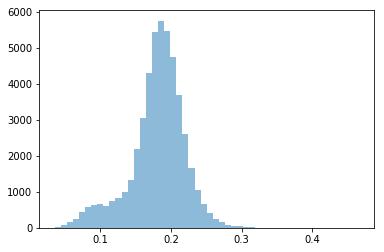

Average Standard Deviation: 0.181088


In [26]:
n, bins, patches = plt.hist(stds,bins=50,alpha=0.5,label="sentence1")
plt.show()
print('Average Standard Deviation: ' + str(np.mean(stds)))